In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")

In [2]:
pricing = pd.read_csv('datasets/pricing_optimization.csv')  
pricing

,Product ID,Store ID,Price,Competitor Prices,Discounts,Sales Volume,Customer Reviews,Return Rate (%),Storage Cost,Elasticity Index
0,9502,13,31.61,56.14,19.68,255,3,13.33,6.72,1.78
1,2068,77,35.51,63.04,16.88,5,3,1.50,8.38,1.67
2,7103,59,6.54,30.61,10.86,184,3,9.44,3.86,2.46
3,5288,19,13.61,15.94,45.28,337,1,15.11,8.80,0.88
4,7212,66,62.68,30.64,33.48,80,3,19.62,9.74,1.00
...,...,...,...,...,...,...,...,...,...,...
9995,4408,48,94.99,21.83,39.72,367,4,5.97,6.14,1.25
9996,1634,64,58.99,12.98,37.95,184,1,1.47,8.21,1.08
9997,9766,74,6.93,31.08,1.37,402,3,8.18,7.25,2.27
9998,1130,23,39.27,37.18,31.85,493,2,4.79,5.44,0.68


In [3]:
# Check for missing values
print(pricing.isnull().sum())

# Drop rows with missing Price or Sales Volume
pricing = pricing.dropna(subset=['Price', 'Sales Volume'])


Product ID           0
Store ID             0
Price                0
Competitor Prices    0
Discounts            0
Sales Volume         0
Customer Reviews     0
Return Rate (%)      0
Storage Cost         0
Elasticity Index     0
dtype: int64


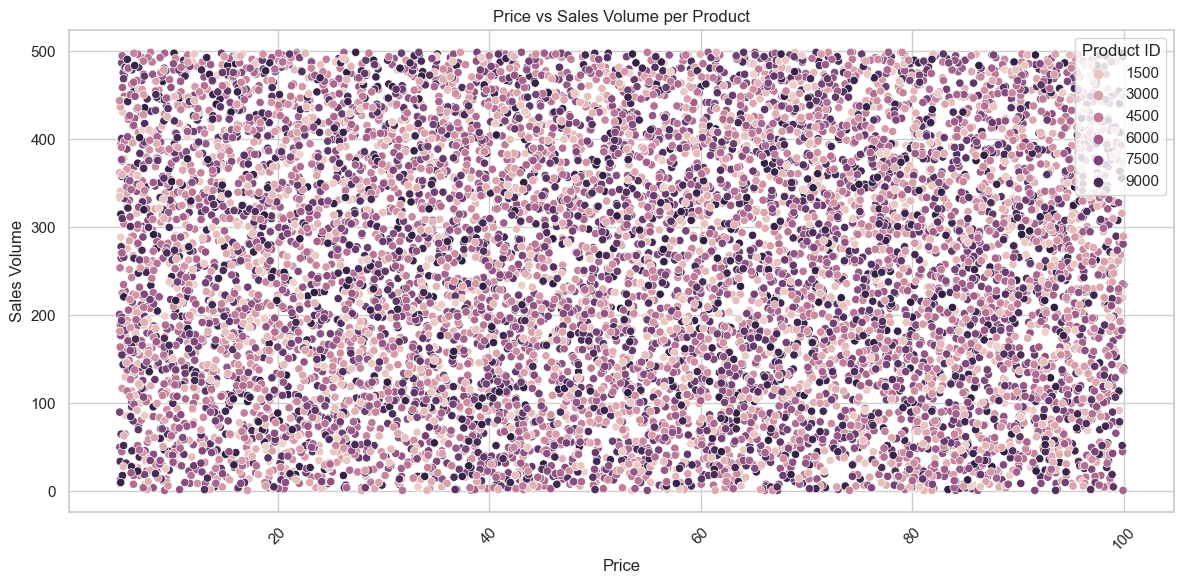

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pricing, x='Price', y='Sales Volume', hue='Product ID')
plt.title('Price vs Sales Volume per Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
products = pricing['Product ID'].unique()
elasticity_results = []

for product in products:
    product_data = pricing[pricing['Product ID'] == product]
    
    if len(product_data) >= 5:
        X = product_data[['Price']]
        y = product_data['Sales Volume']
        
        model = LinearRegression()
        model.fit(X, y)
        
        slope = model.coef_[0]
        intercept = model.intercept_
        
        elasticity_results.append({
            'Product ID': product,
            'Price Elasticity': slope,
            'Intercept': intercept
        })

elasticity_df = pd.DataFrame(elasticity_results)
elasticity_df


,Product ID,Price Elasticity,Intercept
0,8681,0.945039,104.751604
1,1343,-5.265881,655.731504
2,6694,-2.344570,341.828819
3,8864,6.162615,-50.522686
4,6091,1.128809,164.732083
5,8876,0.961726,300.019493
6,3448,-1.390734,300.830237
7,6818,-0.670748,263.635217
8,8942,0.981400,29.476481
9,4360,0.872522,294.188048


In [6]:
merged_df = pd.merge(elasticity_df, pricing[['Product ID', 'Return Rate (%)', 'Storage Cost', 'Elasticity Index']].drop_duplicates(), on='Product ID', how='left')
merged_df

,Product ID,Price Elasticity,Intercept,Return Rate (%),Storage Cost,Elasticity Index
0,8681,0.945039,104.751604,0.29,7.59,1.72
1,8681,0.945039,104.751604,9.09,8.05,0.89
2,8681,0.945039,104.751604,9.47,8.68,1.50
3,8681,0.945039,104.751604,6.43,7.36,1.41
4,8681,0.945039,104.751604,4.25,6.28,0.89
...,...,...,...,...,...,...
226,2654,-0.377174,271.448279,0.89,9.74,1.94
227,2654,-0.377174,271.448279,6.97,8.38,1.36
228,2654,-0.377174,271.448279,13.25,9.17,1.65
229,2654,-0.377174,271.448279,0.73,7.41,1.76


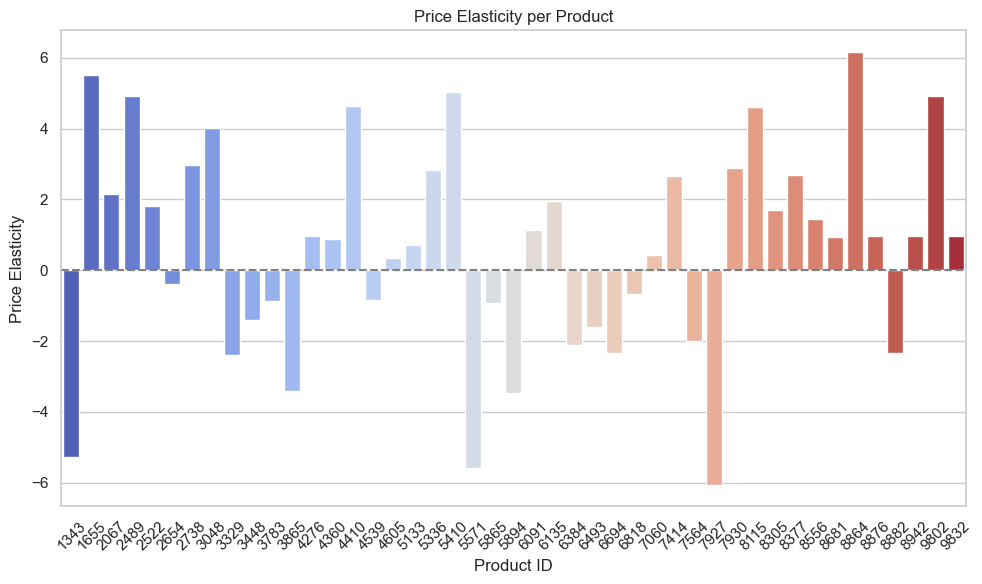

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='Product ID', y='Price Elasticity', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Price Elasticity per Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
optimal_prices = []

for product in products:
    product_data = pricing[pricing['Product ID'] == product]
    
    if len(product_data) >= 5:
        X = product_data[['Price']]
        y = product_data['Sales Volume']
        
        model = LinearRegression()
        model.fit(X, y)
        
        min_price = int(X.min())
        max_price = int(X.max())
        test_prices = pd.Series(range(min_price, max_price + 1))
        
        predicted_sales = model.predict(test_prices.to_frame())
        revenue = test_prices * predicted_sales
        
        max_rev_idx = revenue.idxmax()
        
        optimal_prices.append({
            'Product ID': product,
            'Optimal Price': test_prices[max_rev_idx],
            'Estimated Revenue': revenue[max_rev_idx]
        })

optimal_price_df = pd.DataFrame(optimal_prices)
optimal_price_df


C:\Users\SANIA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\SANIA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\SANIA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\SANIA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\SANIA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\SANIA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

,Product ID,Optimal Price,Estimated Revenue
0,8681,93,17915.537591
1,1343,62,20413.305531
2,6694,64,12273.686410
3,8864,81,36340.579888
4,6091,80,20402.946962
5,8876,99,39127.807788
6,3448,92,15905.212064
7,6818,98,19394.384909
8,8942,92,11018.402517
9,4360,71,25285.733803


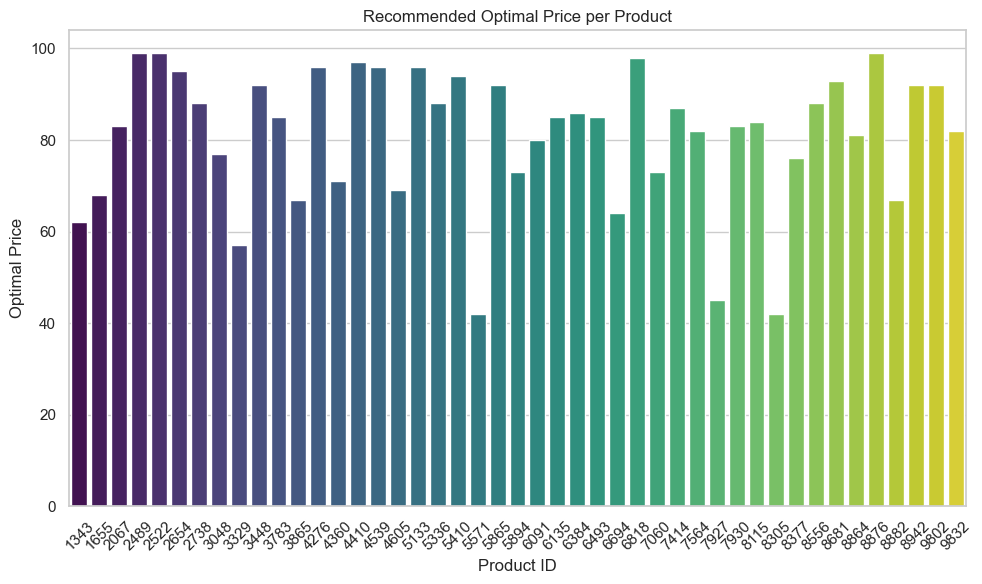

In [9]:
optimal_price_df.to_csv("optimal_prices.csv", index=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=optimal_price_df, x='Product ID', y='Optimal Price', palette='viridis')
plt.title('Recommended Optimal Price per Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
final_report = pd.merge(optimal_price_df, merged_df, on='Product ID')
final_report.to_csv("final_pricing_report.csv", index=False)
final_report.head()

,Product ID,Optimal Price,Estimated Revenue,Price Elasticity,Intercept,Return Rate (%),Storage Cost,Elasticity Index
0,8681,93,17915.537591,0.945039,104.751604,0.29,7.59,1.72
1,8681,93,17915.537591,0.945039,104.751604,9.09,8.05,0.89
2,8681,93,17915.537591,0.945039,104.751604,9.47,8.68,1.50
3,8681,93,17915.537591,0.945039,104.751604,6.43,7.36,1.41
4,8681,93,17915.537591,0.945039,104.751604,4.25,6.28,0.89
